In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create a population of product data
population_size = 10000
country <- sample(c("Germany", "France", "Spain", "Italy"), population_size, replace = TRUE)
defects <- round(abs(rnorm(population_size, mean = 800, sd = 500)))
quantity <- 1000*defects + round(abs(rnorm(population_size, mean = 50000, sd = 100000)))
code <- round(sample(1:population_size/10, population_size, replace = TRUE))
code <- paste("Code_", code, sep="")
df <- data.frame("StockCode" = code, "Quantity" = quantity, "Defects" = defects, "Country" = country)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,StockCode,Quantity,Defects,Country
,<fct>,<dbl>,<dbl>,<fct>
6174,Code_271,679039,676,France
3547,Code_434,1226909,1085,Spain
7212,Code_827,897568,878,France
8113,Code_144,1179081,1074,Germany
3564,Code_447,1826713,1754,Germany
8780,Code_347,650183,599,Italy
907,Code_201,768560,746,Germany
2326,Code_325,1005991,964,Germany
8533,Code_495,1330567,1268,Italy


          
Pareto chart analysis for defectCount
              Frequency    Cum.Freq.   Percentage Cum.Percent.
  Code_421  1950.000000  1950.000000    11.698362    11.698362
  Code_217  1824.000000  3774.000000    10.942468    22.640830
  Code_963  1777.000000  5551.000000    10.660508    33.301338
  Code_447  1754.000000  7305.000000    10.522527    43.823865
  Code_931  1686.000000  8991.000000    10.114584    53.938449
  Code_457  1598.000000 10589.000000     9.586658    63.525106
  Code_153  1581.000000 12170.000000     9.484672    73.009779
  Code_717  1536.000000 13706.000000     9.214710    82.224489
  Code_593  1492.000000 15198.000000     8.950747    91.175235
  Code_113  1471.000000 16669.000000     8.824765   100.000000

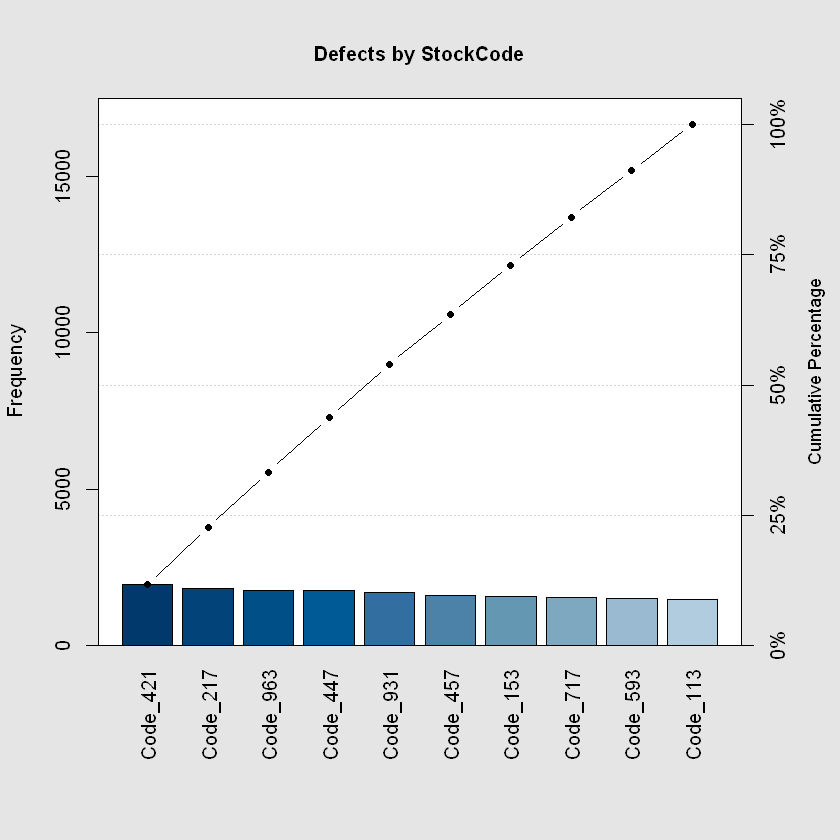

In [4]:
# Pareto chart
orderedData <- myData[order(myData$Defects, decreasing = TRUE), ]
orderedData <- head(orderedData, 10)
defectCount <- orderedData$Defects
names(defectCount) <- orderedData$StockCode
pareto.chart(defectCount, main="Defects by StockCode")

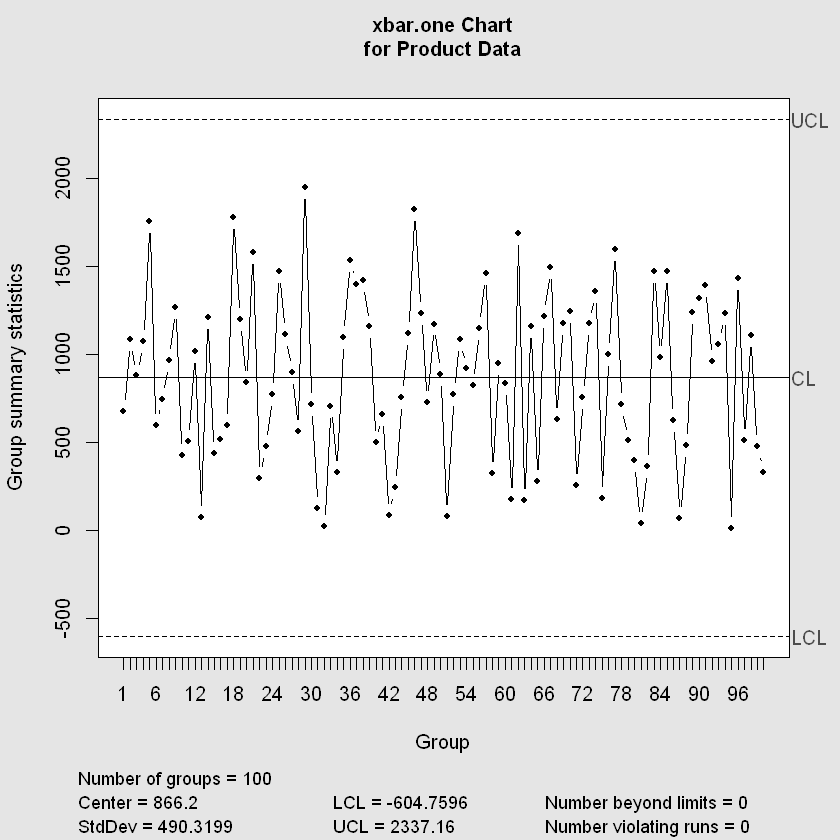

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 866.2           LSL = 200
       StdDev = 490.3           USL = 600

Capability indices:

         Value      2.5%    97.5%
Cp     0.13597   0.11704   0.1549
Cp_l   0.45290   0.37668   0.5291
Cp_u  -0.18097  -0.12220  -0.2397
Cp_k  -0.18097  -0.11094  -0.2510
Cpm    0.09854   0.08198   0.1151

Exp<LSL 8.7%	 Obs<LSL 11%
Exp>USL 71%	 Obs>USL 67%


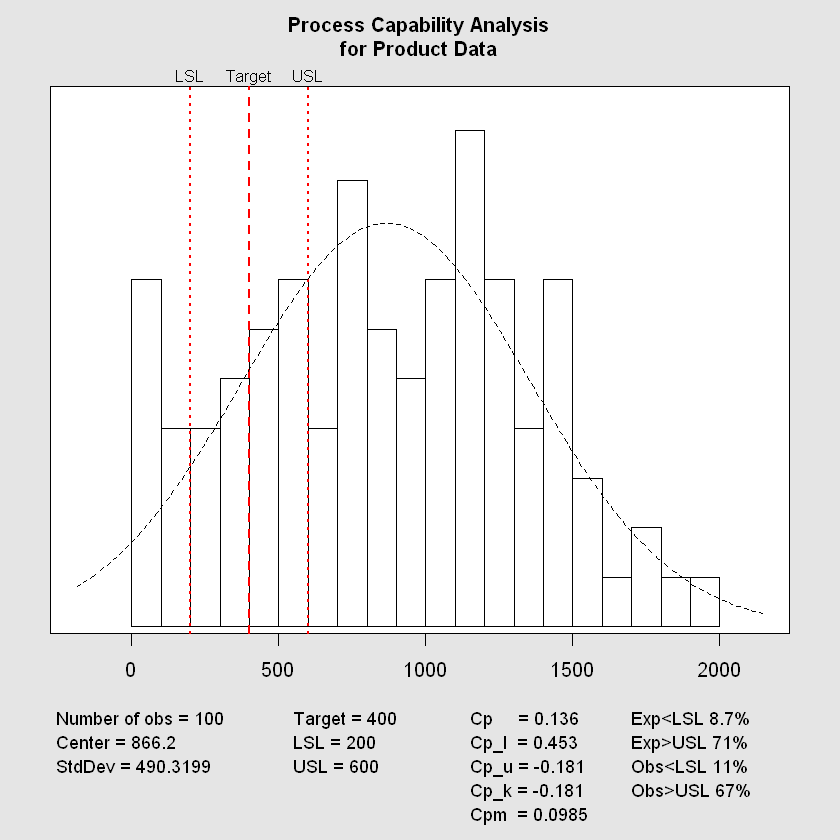

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

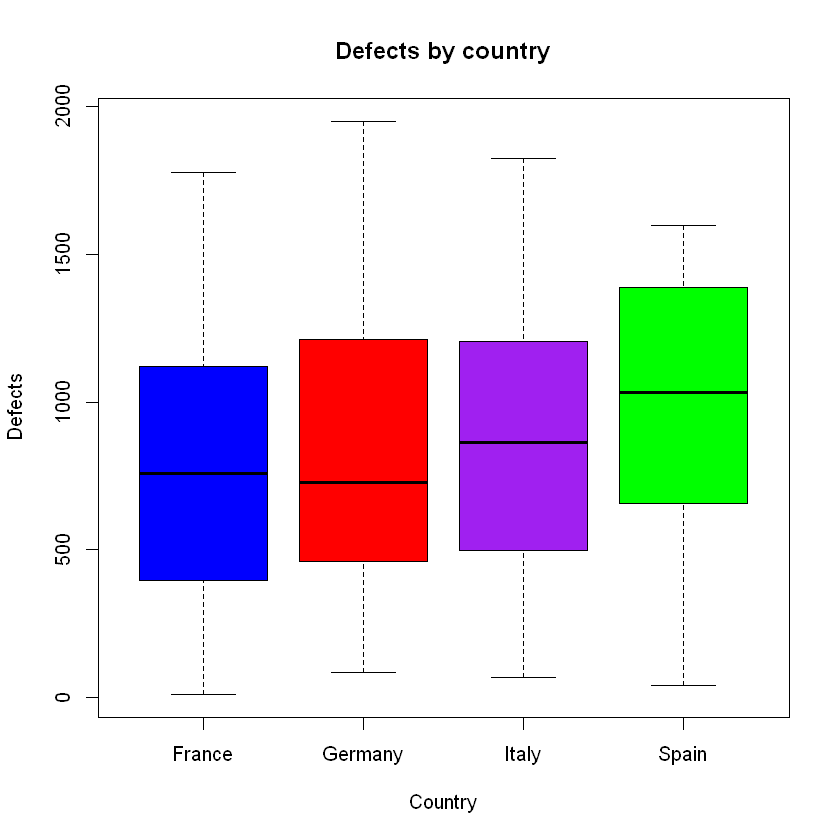

In [7]:
# Boxplot of defects by country
boxplot(data=myData, Defects ~ Country, 
        col = c("blue", "red", "purple", "green"),
        ylab = "Defects",
        main = "Defects by country")

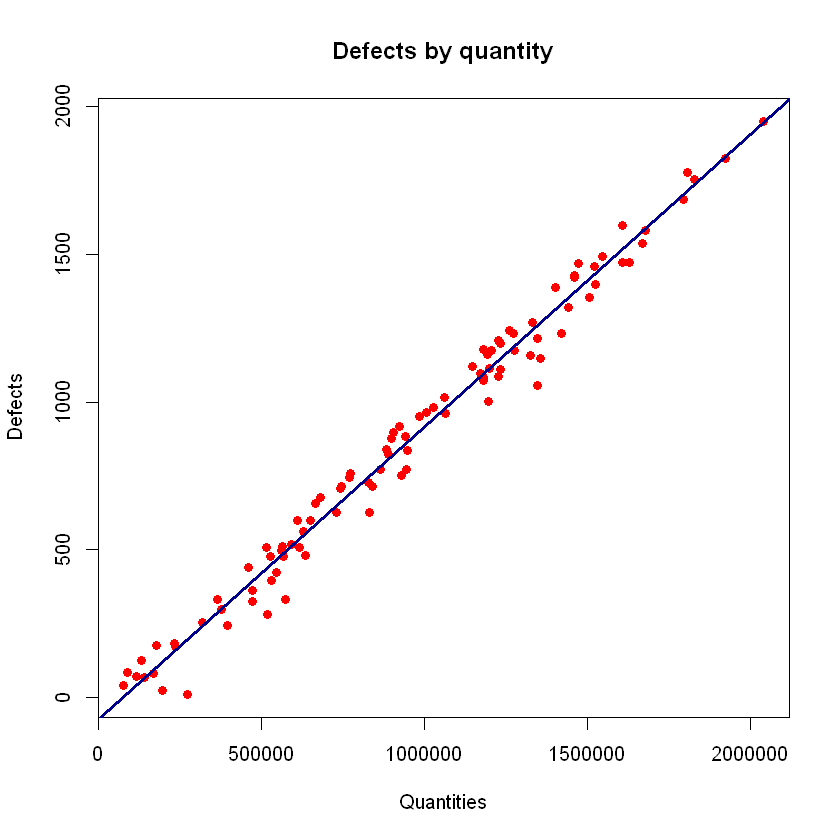

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantities",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

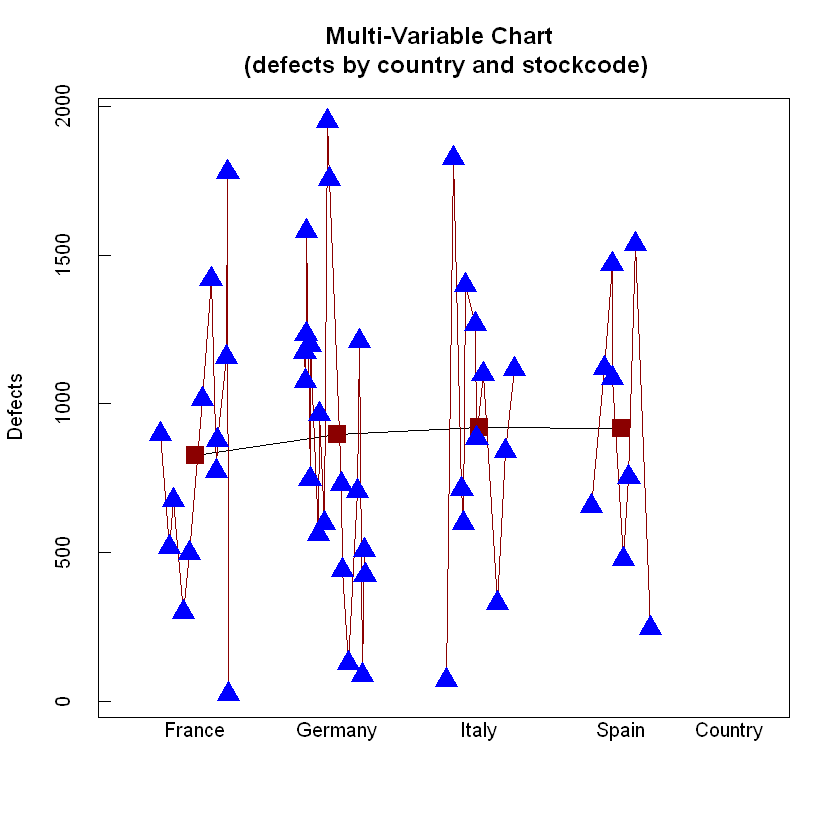

In [9]:
# Multivari chart of defects by country and stockcode
multivari("Defects",                          # Response 
          "Country", "StockCode",             # Factors  
          data = head(myData, 50),            # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 1,
          legend = FALSE,
          main = "Multi-Variable Chart \n (defects by country and stockcode)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Country, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Country      3   640455  213485   0.923  0.433
Residuals   96 22201435  231265               

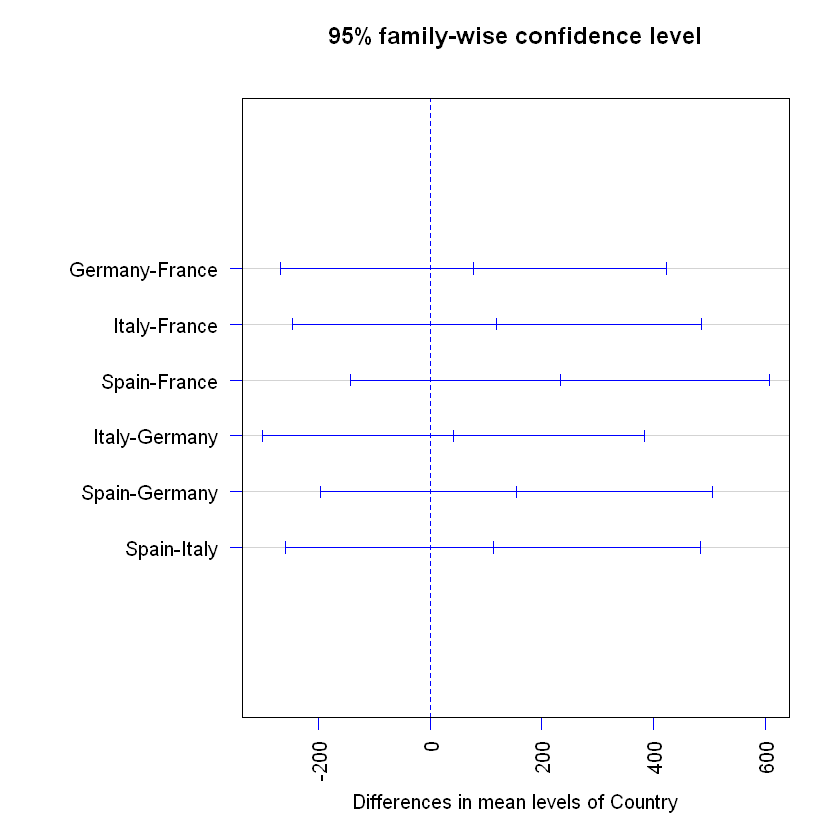

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest